In [2]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

#import matplotlib as mpl
import seaborn as sns
%matplotlib inline

# Clustering II: In Practice

...featuring $k$-means

Today we'll do an extended example showing k-means clustering in practice and in the context of the python libraries
__scikit-learn.__

__scikit-learn__ is the main python library for machine learning functions.

Our goals are to learn:
* How clustering is used in practice
* Tools for evaluating the quality of a clustering
* Tools for assigning meaning or labels to a cluster
* Important visualizations
* A little bit about feature extraction for text

## Training wheels: Synthetic data

Generally, when learning about or developing a new unsupervised method, it's a good idea to try it out on a dataset in which you already know the "right" answer.

One way to do that is to generate synthetic data that has some known properties.

Among other things, scikit-learn contains tools for generating synthetic data for testing.

In [3]:
import sklearn.datasets as sk_data
X, y = sk_data.make_blobs(n_samples=100, centers=3, n_features=30,
                          center_box=(-10.0, 10.0),random_state=0)

To get a sense of the raw data we can inspect it.

For statistical visualization, a good library is `seaborn`, imported as `sns`.

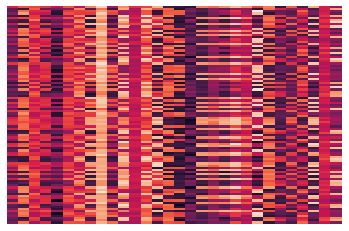

In [4]:
sns.heatmap(X, xticklabels = False, yticklabels = False, linewidths = 0, cbar = False);

That plot shows all the data.   

As usual, each row is a data item and the columns correspond to features (which are simply coordinates here).

Geometrically, these points live in a __30 dimensional__ space, so we cannot directly visualize their geometry.  

This is a __big problem__ that you will run into time and again!

We will discuss methods for visualizing high dimensional data later on.

For now, we will use a method that can turn a set of pairwise distances into an approximate 2-D representation __in some cases.__

So let's compute the pairwise distances for visualization purposes.

We can compute all pairwise distances in a single step using a scikit-learn function:

In [5]:
import sklearn.metrics as metrics
euclidean_dists = metrics.euclidean_distances(X)
euclidean_dists

array([[ 0.        , 47.73797008, 45.18787978, ..., 47.87535624,
        49.64694402, 45.58307694],
       [47.73797008,  0.        , 43.66760596, ...,  7.3768511 ,
         7.36794305, 43.51069074],
       [45.18787978, 43.66760596,  0.        , ..., 42.55609472,
        43.80829605,  9.31642449],
       ...,
       [47.87535624,  7.3768511 , 42.55609472, ...,  0.        ,
         8.19377462, 41.81523421],
       [49.64694402,  7.36794305, 43.80829605, ...,  8.19377462,
         0.        , 43.41205895],
       [45.58307694, 43.51069074,  9.31642449, ..., 41.81523421,
        43.41205895,  0.        ]])

### Visualizing with Multidimensional Scaling

The idea behind Multidimensional Scaling (MDS) is: 

* given a distance (or dissimilarity) matrix, 
* find a set of coordinates for the points that approximates those distances as well as possible.

Usually we are looking for points in 2D or maybe 3D for visualization purposes.

The algorithm works using a gradient descent algorithm that starts with random positions and moves points in a way that reduces the disparity between true distance and euclidean distance.

Note that there are many ways that this can fail!  

* Perhaps the dissimilarities are not well modeled as euclidean distances
* It may be necessary to use more than 2 dimensions to capture any clustering via euclidean distances

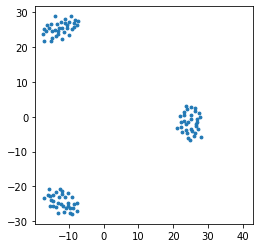

In [6]:
import sklearn.manifold
mds = sklearn.manifold.MDS(n_components=2, max_iter=3000, eps=1e-9, random_state=0,
                   dissimilarity = "precomputed", n_jobs = 1)
fit = mds.fit(euclidean_dists)
pos = fit.embedding_
plt.scatter(pos[:, 0], pos[:, 1], s=8)
plt.axis('square');

So we can see that, although the data lives in 30 dimensions, we can get a sense of how the points are clustered by approximately placing the points into two dimensions.

A second way to visualize the data is by using a heatmap on the set of pairwise distances.

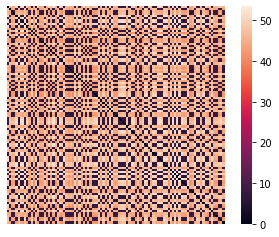

In [7]:
sns.heatmap(euclidean_dists, xticklabels=False, yticklabels=False, linewidths=0, 
            square=True );

## Applying  $k$-Means 

The Python package __`scikit-learn`__ has a huge set of tools for unsupervised learning generally, and clustering specifically.  

These are in __`sklearn.cluster.`__

There are 3 functions in all the clustering classes, 

* __`fit()`__, 
* __`predict()`__, and 
* __`fit_predict()`__. 

`fit()` builds the model from the training data (e.g. for kmeans, it finds the
            centroids), 
            
`predict()` assigns labels to the data after building
            the model, and
            
`fit_predict()` does both in a single step.

In [8]:
from sklearn.cluster import KMeans
kmeans = KMeans(init = 'k-means++', n_clusters = 3, n_init = 100)
kmeans.fit_predict(X)

array([1, 2, 0, 0, 2, 1, 2, 2, 1, 2, 0, 1, 0, 1, 2, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 2, 2, 1, 0, 0, 0, 0, 1, 0, 1, 0, 2, 0, 2, 0, 2, 2, 2, 1, 0,
       1, 0, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 1, 2,
       0, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 2, 1, 2, 2, 2, 1, 0, 0, 2, 1,
       1, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 0], dtype=int32)

All the tools in `scikit-learn` are implemented as python objects.

Thus, the general sequence for using a tool from `scikit-learn` is:

* Create the object, probably with some parameter settings or intialization,
* Run the method, generally by using the `fit()` function, and
* Examine the results, which are generally property variables of the object.

In [9]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_
error = kmeans.inertia_

In [10]:
print(f'The total error of the clustering is: {error:0.1f}.')
print('\nCluster labels:')
print(labels)
print('\nCluster centroids:')
print(centroids)

The total error of the clustering is: 2733.8.

Cluster labels:
[1 2 0 0 2 1 2 2 1 2 0 1 0 1 2 0 0 1 0 2 0 2 0 1 2 2 1 0 0 0 0 1 0 1 0 2 0
 2 0 2 2 2 1 0 1 0 1 2 1 0 0 1 1 1 1 0 1 2 2 0 1 0 2 1 1 2 0 1 1 2 2 2 1 1
 0 1 2 1 2 1 2 2 2 1 0 0 2 1 1 0 1 2 2 0 1 0 0 2 2 0]

Cluster centroids:
[[-4.7833887   5.32946939 -0.87141823  1.38900567 -9.59956915  2.35207348
   2.22988468  2.03394692  8.9797878   3.67857655 -2.67618716 -1.17595897
   3.76433199 -8.46317271  3.28114395  3.73803392 -5.73436869 -7.0844462
  -3.75643598 -3.07904369  1.36974653 -0.95918462  9.91135428 -8.17722281
  -5.8656831  -6.76869078  3.12196673 -4.85745245 -0.70449349 -4.94582258]
 [ 0.88697885  4.29142902  1.93200132  1.10877989 -1.55994342  2.80616392
  -1.11495818  7.74595341  8.92512875 -2.29656298  6.09588722  0.47062896
   1.36408008  8.63168509 -8.54512921 -8.59161818 -9.64308952  6.92270491
   5.65321496  7.29061444  9.58822315  5.79602014 -0.84970449  5.46127493
  -7.77730238  2.75092191 -7.17026663  9.074759

### Visualizing the Results of Clustering

Let's visualize the results.  We'll do that by reordering the data items according to their cluster.

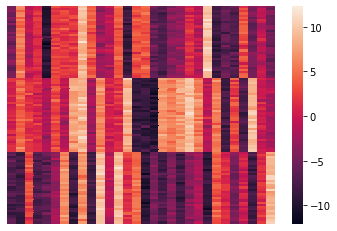

In [11]:
idx = np.argsort(labels)
rX = X[idx, :]
sns.heatmap(rX, xticklabels = False, yticklabels = False, linewidths = 0);

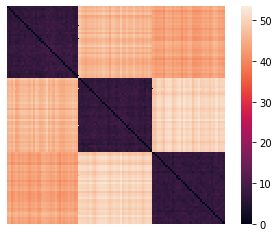

In [12]:
rearranged_dists = euclidean_dists[idx,:][:,idx]
sns.heatmap(rearranged_dists, xticklabels = False, yticklabels = False, linewidths = 0, square = True);

## Cluster Evaluation

How do we know whether the clusters we get represent "real" structure in our data?

Consider this dataset, which we have clustered using $k$-means:

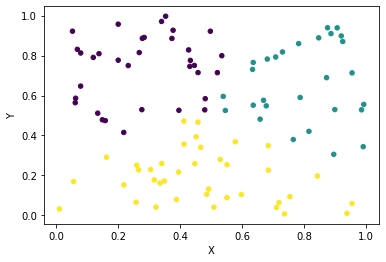

In [68]:
unif_X = np.random.default_rng().uniform(0, 1, 100)
unif_Y = np.random.default_rng().uniform(0, 1, 100)
df = pd.DataFrame(np.column_stack([unif_X, unif_Y]), columns = ['X', 'Y'])
kmeans = KMeans(init = 'k-means++', n_clusters = 3, n_init = 100)
df['label'] = kmeans.fit_predict(df[['X', 'Y']])
df.plot('X', 'Y', kind = 'scatter', c = 'label', colormap='viridis', colorbar = False);

In fact, this dataset was generated using uniform random numbers for the coordinates.

So ... it truly has __no__ clusters.

The point is: any clustering algorithm will always output some "clustering" of the data.

The question is, does the clustering reflect __real__ structure?

Generally we encounter two problems:
* Are there "real" clusters in the data?
* if so, __how many__ clusters are there?

There is often no definitive answer to either of these questions.

You will often need to use your judgement in answering them.

### Rand Index

One tool we may be able to use in some settings is __external__ information about the data.

In particular, we may have knowledge from some other source about the nature of the clusters in the data.

In that case, what we need is a way to compare a proposed clustering with some externally-known, "ground truth" clustering.

The Rand Index is a __similarity measure__ for __clusterings.__   We can use it to compare two clusterings.

Or, if we are testing an algorithm on data for which we know ground truth, we can use it to assess the algorithm's accuracy.

Each item in our dataset is assumed to have two labelings, one for each clustering.

For example, ground truth label assignment $T$ and a clustering $C$. 

In [71]:
X_rand, y_rand = sk_data.make_blobs(n_samples=[100, 250, 150], centers = [[1, 2],[1.5, 3], [2, 4]], n_features = 2,
                          center_box = (-10.0, 10.0), cluster_std = [.2, .3, .2], random_state = 0)
df_rand_gt = pd.DataFrame(np.column_stack([X_rand[:, 0], X_rand[:, 1], y_rand]), columns = ['X', 'Y', 'label'])
df_rand_clust = df_rand_gt.copy()
kmeans = KMeans(init = 'k-means++', n_clusters = 3, n_init = 100)
df_rand_clust['label'] = kmeans.fit_predict(df_rand_gt[['X', 'Y']])

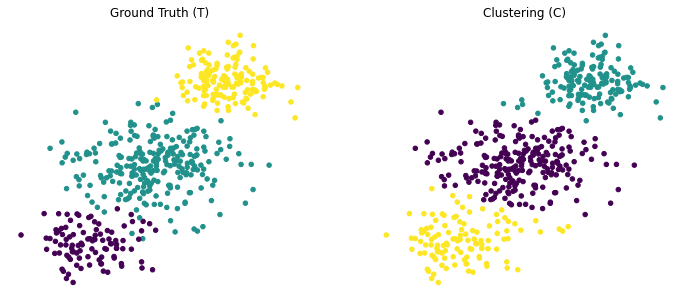

In [72]:
figs, axs = plt.subplots(1, 2, figsize = (12, 5))
df_rand_gt.plot('X', 'Y', kind = 'scatter', c = 'label', colormap='viridis', ax = axs[0],
                   colorbar = False)
axs[0].set_title('Ground Truth (T)')
axs[0].set_axis_off()
df_rand_clust.plot('X', 'Y', kind = 'scatter', c = 'label', colormap='viridis', ax = axs[1],
                  colorbar = False)
axs[1].set_title('Clustering (C)')
axs[1].set_axis_off();

__Definition of Rand Index__.

Intuitively, the idea behind Rand Index is to consider __pairs__ of points, and ask whether pairs that fall into the same cluster in $T$ also fall into the same cluster in $C$.

Specifically:

Let $a$ be the number of pairs of elements that have the same label in $T$ and the same label in $C$. 

Let $b$ be: the number of pairs of elements that have different labels in $T$ and different labels in $C$. 

Then the Rand Index is: 
$$ \mbox{RI}(T,C) = \frac{a+b}{n \choose 2} $$

How do we know whether a particular Rand Index score is significant?

We might compare it to the RI for a __random__ assignment of points to labels.

This leads to the __Adjusted Rand Index.__

__Definition of Adjusted Rand Index.__

To "calibrate" the Rand Index this way, we use the expected Rand Index of random labelings, denoted $E[\text{RI}]$.   

The Expected Rand Index considers $C$ to be a clustering that has the same cluster sizes as $T$, but labels are assigned at random.

Using that, we define the adjusted Rand index as a simple __rescaling__ of RI:

\begin{equation}
\text{ARI} = \frac{\text{RI} - E[\text{RI}]}{\max(\text{RI}) - E[\text{RI}]}
\end{equation}

The computation of the $E[\text{RI}]$ and the $\max(\text{RI})$ are simple combinatorics (we'll omit the derivation).

__Example.__

Let's consider again our 3-cluster dataset with known labels `y`.

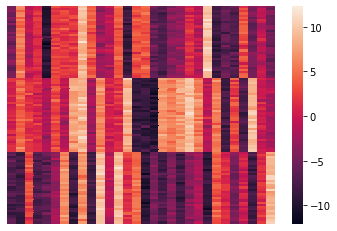

In [74]:
sns.heatmap(rX, xticklabels = False, yticklabels = False, linewidths = 0);

Here is the adjusted Rand Index, when using $k$-means to cluster this dataset for 1 to 10 clusters:

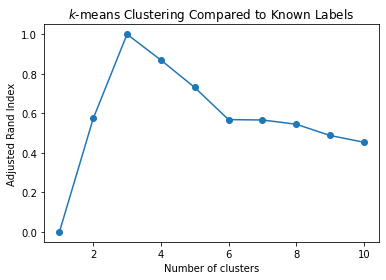

In [99]:
def ri_evaluate_clusters(X,max_clusters,ground_truth):
    ri = np.zeros(max_clusters+1)
    ri[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        ri[k] = metrics.adjusted_rand_score(kmeans.labels_,ground_truth)
    return ri
    
ri = ri_evaluate_clusters(X, 10, y)
plt.plot(range(1,len(ri)), ri[1:], 'o-')
plt.xlabel('Number of clusters')
plt.title('$k$-means Clustering Compared to Known Labels')
plt.ylabel('Adjusted Rand Index');

## Deciding on the Number of Clusters

The second question we face in evaluating a clustering is how many clusters are present.

In practice, to use $k$-means or most other clustering methods, one must choose $k$, the number of clusters, via some process.

### Inspecting Clustering Error

The first thing you might do is to look at the $k$-means objective function  and see if it levels off after a certain point.

Recall that the $k$-means objective can be considered the clustering "error".

If the error stops going down, that would suggest that the clustering is not improving as the number of clusters is increased.

In [101]:
error = np.zeros(11)
for k in range(1,11):
    kmeans = KMeans(init='k-means++', n_clusters = k, n_init = 10)
    kmeans.fit_predict(X)
    error[k] = kmeans.inertia_

For our synthetic data, here is the $k$-means objective, as a function of $k$:

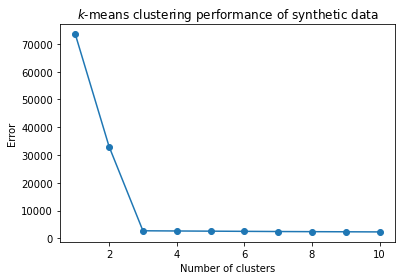

In [102]:
plt.plot(range(1, len(error)), error[1:], 'o-')
plt.xlabel('Number of clusters')
plt.title(r'$k$-means clustering performance of synthetic data')
plt.ylabel('Error');

__Warning__: This synthetic data is not at all typical.   You will almost never see such a sharp change in the error function as we see here.

Let's create a function for later use.

In [94]:
def evaluate_clusters(X,max_clusters):
    error = np.zeros(max_clusters+1)
    error[0] = 0;
    for k in range(1,max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters=k, n_init=10)
        kmeans.fit_predict(X)
        error[k] = kmeans.inertia_
    return error

### Silhouette Coefficient

Of course, normally, the ground truth labels are not known.

In that case, evaluation must be performed using the model itself. |

Recall our definition of clustering: 

> a grouping of data objects, such that the objects within a group are similar (or near) to one another and dissimilar (or far) from the objects in other groups.

This suggests a metric that could evaluate a clustering: comparing the distances between points within a cluster, to the distances between points in different clusters.

The Silhouette Coefficient is an example of such an evaluation, where a higher Silhouette Coefficient score relates to a model with "better defined" clusters. 

(__`sklearn.metrics.silhouette_score`__)

Let $a$ be the mean distance between a data point and all other points in the same cluster.

Let $b$ be the mean distance between a data point and all other points in the next nearest cluster. 

Then the 
**Silhouette Coefficient** for a clustering is:
$$s = \frac{b - a}{\max(a, b)}$$

In [37]:
sc = metrics.silhouette_score(X, labels, metric='euclidean')
print(sc)

0.8319348841402534


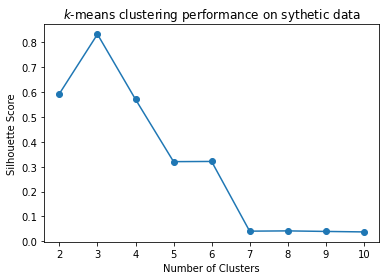

In [112]:
def sc_evaluate_clusters(X, max_clusters, n_init, seed):
    s = np.zeros(max_clusters+1)
    s[0] = 0;
    s[1] = 0;
    for k in range(2, max_clusters+1):
        kmeans = KMeans(init='k-means++', n_clusters = k, n_init = n_init, random_state = seed)
        kmeans.fit_predict(X)
        s[k] = metrics.silhouette_score(X, kmeans.labels_, metric = 'euclidean')
    return s

s = sc_evaluate_clusters(X, 10, 10, 1)
plt.plot(range(2, len(s)), s[2:], 'o-')
plt.xlabel('Number of Clusters')
plt.title('$k$-means clustering performance on sythetic data')
plt.ylabel('Silhouette Score');

Again, these results are more perfect than typical. 

But the general idea is to look for a local maximum in the Silhouette Coefficient as the potential number of clusters.

## Taking the Training Wheels Off: Real Data

As a "real world" example, we'll use the "20 Newsgroup" data provided as example data in sklearn.

(http://scikit-learn.org/stable/datasets/twenty_newsgroups.html).

In [92]:
from sklearn.datasets import fetch_20newsgroups

"""
categories = [
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'talk.religion.misc',
 'comp.graphics',
 'sci.space',
 'rec.autos',
 'rec.sport.baseball'
]
"""
categories = ['comp.os.ms-windows.misc', 'sci.space', 'rec.sport.baseball']
news_data = fetch_20newsgroups(subset = 'train', categories = categories)
print(news_data.target, len(news_data.target))
print(news_data.target_names)

[2 0 0 ... 2 1 2] 1781
['comp.os.ms-windows.misc', 'rec.sport.baseball', 'sci.space']


In [93]:
news_data.data[0]

'From: aws@iti.org (Allen W. Sherzer)\nSubject: Re: DC-X update???\nOrganization: Evil Geniuses for a Better Tomorrow\nLines: 122\n\nIn article <ugo62B8w165w@angus.mi.org> dragon@angus.mi.org writes:\n\n>Exactly when will the hover test be done, \n\nEarly to mid June.\n\n>and will any of the TV\n>networks carry it.  I really want to see that...\n\nIf they think the public wants to see it they will carry it. Why not\nwrite them and ask? You can reach them at:\n\n\n                          F: NATIONAL NEWS MEDIA\n\n\nABC "World News Tonight"                 "Face the Nation"\n7 West 66th Street                       CBS News\nNew York, NY 10023                       2020 M Street, NW\n212/887-4040                             Washington, DC 20036\n                                         202/457-4321\n\nAssociated Press                         "Good Morning America"\n50 Rockefeller Plaza                     ABC News\nNew York, NY 10020                       1965 Broadway\nNational Desk (

### Feature Extraction

We've discussed a bit the challenges of feature engineering.   

One of the most basic issues concerns how to encode categorical or text data in a form usable by algorithms that expect numeric input.

The starting point is to note that one can encode a set using a binary vector with one component for each potential set member.  

The so-called _bag of words_ encoding for a document is to treat the document as a **multi**set of words.

That is, we simply count how many times each word occurs.   It is a "bag" because all the order of the words in the document is lost.

Surprisingly, we can still tell a lot about the document even without knowing its word ordering.

Counting the number of times each word occurs in a document yields a vector of __term frequencies.__

However, simply using the "bag of words" directly has a number of drawbacks.   First of all, large documents will have more words than small documents.   

Hence it often makes sense to normalize the frequency vectors.

$\ell_1$ or $\ell_2$ normalization are common.

Next, as noted in __scikit-learn__:

>In a large text corpus, some words will be very [frequent] (e.g. “the”, “a”, “is” in English) hence carrying very little meaningful information about the actual contents of the document. 

>If we were to feed the direct count data directly to a classifier those very frequent terms would shadow the frequencies of rarer yet more interesting terms.


>In order to re-weight the count features into floating point values suitable for usage by a classifier it is very common to use the tf–idf transform.

>__Tf__ means __term-frequency__ while __tf–idf__ means __term-frequency times inverse document-frequency.__

>This is a originally a term weighting scheme developed for information retrieval (as a ranking function for search engines results), that has also found good use in document classification and clustering.

The idea is that rare words are more informative than common words.  

(This has connections to information theory).

Hence, the definition of tf-idf is as follows.

First:

$$\text{tf}(t,d) = \text{Number of times term }t \text{ occurs in document } d$$

Next, if $N$ is the total number of documents in the corpus $D$ then:

$$\text{idf}(t,D)=\frac{N}{|\{d\in D : t\in d \}|}$$

where the denominator is the number of documents in which the term $t$ appears.

And finally:

$$\text{tf-idf}(t,d)=\text{tf}(t,d)\times \text{idf}(t,D)$$

In [87]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words = 'english', min_df = 4, max_df = 0.8)
data = vectorizer.fit_transform(news_data.data)

### Getting to know the Data

In [88]:
print(type(data), data.shape)

<class 'scipy.sparse.csr.csr_matrix'> (1781, 9409)


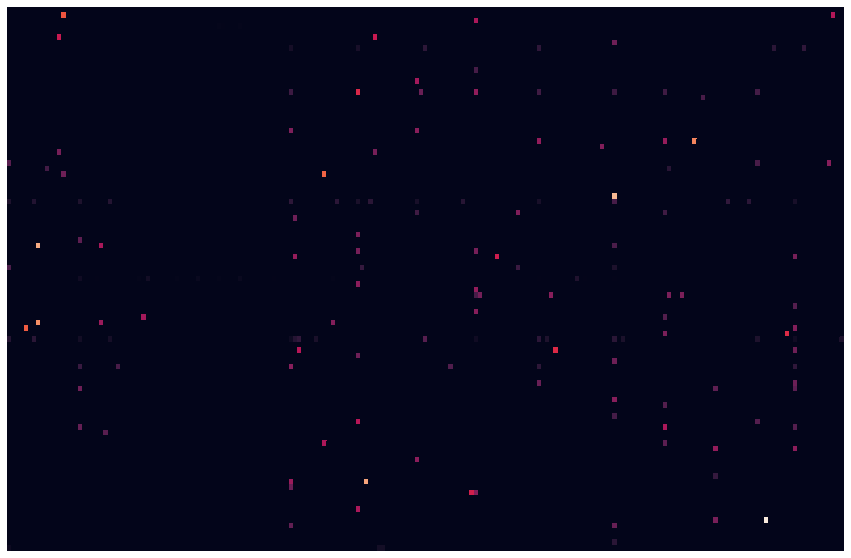

In [89]:
fig, ax1 = plt.subplots(1,1,figsize=(15,10))
dum = sns.heatmap(data[1:100,1:200].todense(), xticklabels=False, yticklabels=False, 
            linewidths=0, cbar=False, ax=ax1)

In [90]:
print(news_data.target)
print(news_data.target_names)

[2 0 0 ... 2 1 2]
['comp.os.ms-windows.misc', 'rec.sport.baseball', 'sci.space']


### Selecting the Number of Clusters

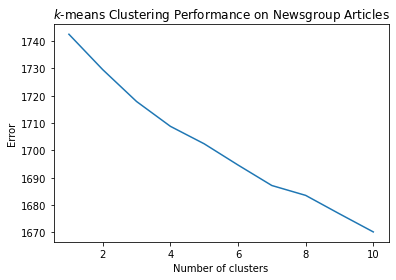

In [105]:
error = evaluate_clusters(data, 10)
plt.plot(range(1, len(error)), error[1:])
plt.title('$k$-means Clustering Performance on Newsgroup Articles')
plt.xlabel('Number of clusters')
plt.ylabel('Error');

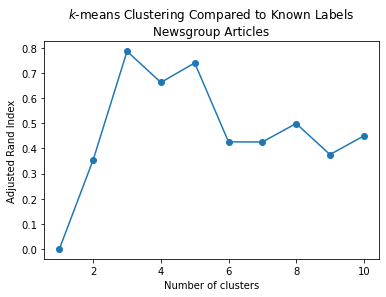

In [104]:
ri = ri_evaluate_clusters(data, 10, news_data.target)
plt.plot(range(1, len(ri)), ri[1:], 'o-')
plt.xlabel('Number of clusters')
plt.title('$k$-means Clustering Compared to Known Labels\nNewsgroup Articles')
plt.ylabel('Adjusted Rand Index');

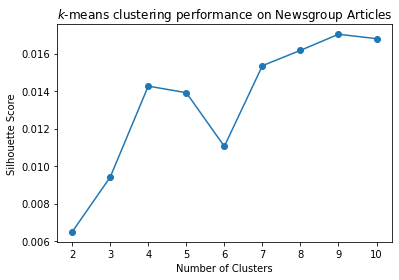

In [121]:
s = sc_evaluate_clusters(data, 10, 100, 3)
plt.plot(range(2, len(s)), s[2:], 'o-')
plt.xlabel('Number of Clusters')
plt.title('$k$-means clustering performance on Newsgroup Articles')
plt.ylabel('Silhouette Score');

### Looking into the clusters

In [128]:
k = 4
kmeans = KMeans(n_clusters = k, init = 'k-means++', max_iter = 100, n_init = 25, random_state = 3)
kmeans.fit_predict(data)

array([1, 1, 1, ..., 3, 0, 2], dtype=int32)

In [132]:
print('Top terms per cluster:')
asc_order_centroids = kmeans.cluster_centers_.argsort()#[:, ::-1]
order_centroids = asc_order_centroids[:,::-1]
terms = vectorizer.get_feature_names()
for i in range(k):
    print(f'Cluster {i}:')
    for ind in order_centroids[i, :10]:
        print(f' {terms[ind]}')
    print('')

Top terms per cluster:
Cluster 0:
 edu
 baseball
 year
 team
 game
 com
 article
 players
 writes
 games

Cluster 1:
 windows
 edu
 com
 file
 dos
 university
 thanks
 ca
 files
 use

Cluster 2:
 space
 nasa
 access
 gov
 edu
 alaska
 digex
 com
 pat
 moon

Cluster 3:
 henry
 toronto
 zoo
 spencer
 zoology
 edu
 work
 utzoo
 kipling
 umd



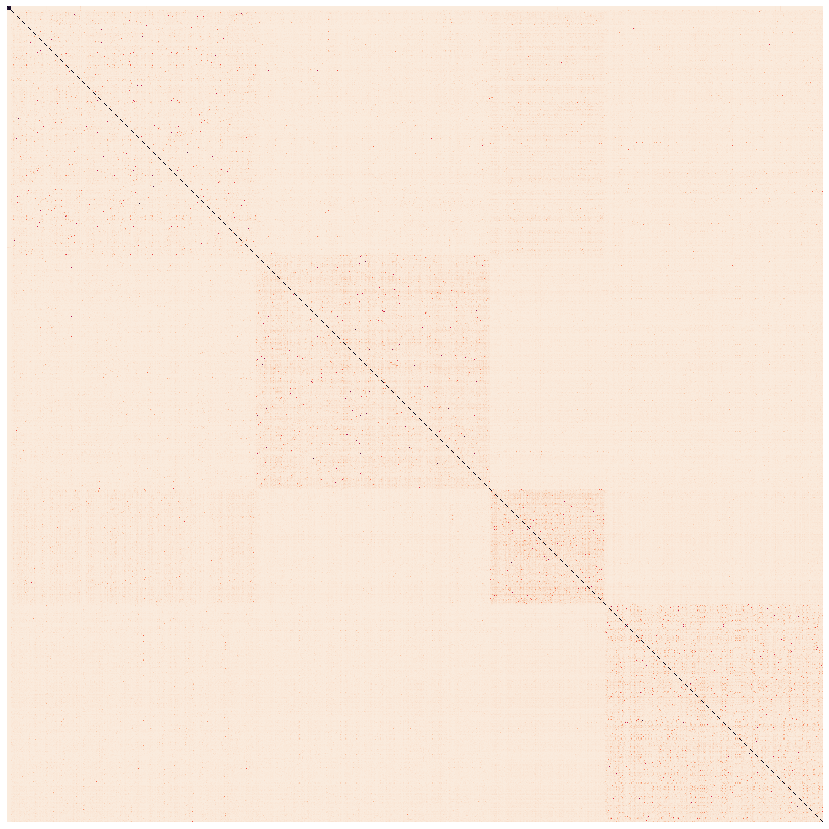

In [124]:
euclidean_dists = metrics.euclidean_distances(data)
labels = kmeans.labels_
idx = np.argsort(labels)
clustered_dists = euclidean_dists[idx][:,idx]
fig, ax1 = plt.subplots(1,1,figsize=(15,15))
dum = sns.heatmap(clustered_dists, xticklabels=False, yticklabels=False, linewidths=0, square=True,cbar=False, ax=ax1)

Let's visualize with MDS.   Note that MDS is a slow algorithm and we can't do all 1700+ data points quickly, so we will take a random sample.

In [125]:
import random
n_items = euclidean_dists.shape[0]
subset = random.sample(range(n_items),500)

fit = mds.fit(euclidean_dists[subset][:,subset])
pos = fit.embedding_

In [136]:
labels

array([1, 2, 2, ..., 4, 1, 4], dtype=int32)

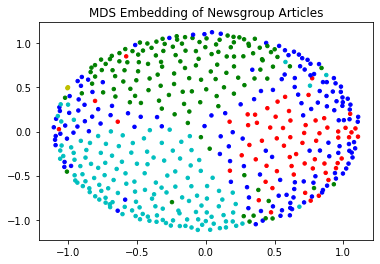

In [137]:
cols = [['y', 'b', 'g', 'r', 'c'][l] for l in labels[subset]]
plt.scatter(pos[:, 0], pos[:, 1], s = 12, c = cols)
plt.title('MDS Embedding of Newsgroup Articles');